## Timeseries Forecasting - Predicting booking of rooms at a hotel

**Objective:** Forecast monthly bookings for the next 6 months

**Motivation:** Predictions of bookings help managers to proactive arrange staffing, hospitality, and pricing 

**Data:** Hotel booking dataset from Kaggle: https://www.kaggle.com/jessemostipak/hotel-booking-demand



In [1]:
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
data = pd.read_csv('hotel_bookings.csv')

### Data Exploration

**hotel:** Resort hotel or City hotel

**is_canceled:** Value indicating if the booking wascanceled (1) or not (0)

**arrival_date_year/arrival_date_month/arrival_date_day_of_month:** year/month/day of the month of the arrival date

From the seasonability plot, we can see the bookings per month are seasonal (as expected)

In [29]:
# split the data into resort hotel data and city hotel data
resort_data = data.loc[data['hotel']=='Resort Hotel']
city_data = data.loc[data['hotel']=='City Hotel']

In [125]:
resort_data.loc[:,'arrival_date'] = resort_data['arrival_date_year'].astype('str') + '-' + resort_data['arrival_date_month'] \
                                  + '-' + resort_data['arrival_date_day_of_month'].astype('str') # create a column to represent the arrival date yyyy-Month-d
resort_data.loc[:,'arrival_date'] = pd.to_datetime(resort_data['arrival_date'],  format='%Y-%B-%d')

city_data.loc[:,'arrival_date'] = city_data['arrival_date_year'].astype('str') + '-' + city_data['arrival_date_month'] \
                                  + '-' + city_data['arrival_date_day_of_month'].astype('str') # create a column to represent the arrival date yyyy-Month-d
city_data.loc[:,'arrival_date'] = pd.to_datetime(city_data['arrival_date'],  format='%Y-%B-%d')

c:\users\renzo\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [52]:
resort_bookings = resort_data.groupby(by='arrival_date',axis=0, as_index=False).size().set_index('arrival_date') # count the number of rows with the same date
city_bookings = city_data.groupby(by='arrival_date',axis=0, as_index=False).size().set_index('arrival_date') # count the number of rows with the same date

In [222]:
resort_monthly_bookings = resort_bookings.resample('M').sum()
city_monthly_bookings = city_bookings.resample('M').sum()

Text(0.5, 1.0, 'City Bookings based on arrival date')

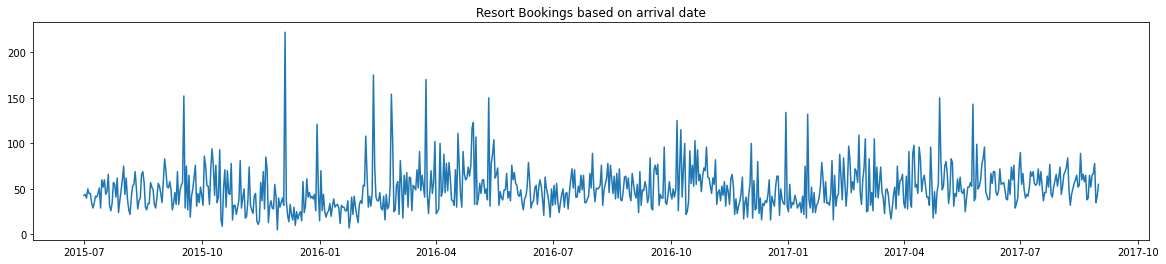

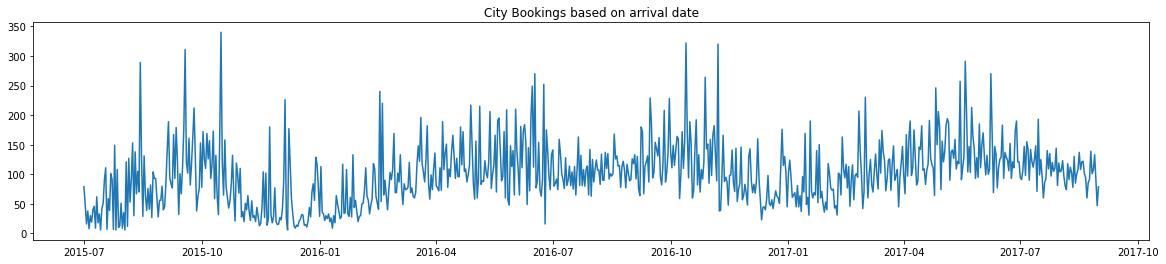

In [174]:
plt.figure(figsize=[20,4])
plt.plot(resort_bookings)
plt.title('Resort Bookings based on arrival date')

plt.figure(figsize=[20,4])
plt.plot(city_bookings)
plt.title('City Bookings based on arrival date')

In [155]:
def seasonality_plot(df, column_name, title=None, xlabel=None, ylabel=None):
    """
    Plots seasonality graphs 
    """
    plt.figure(figsize=[8,2.5])
    years = df.index.year.unique() # list years in df
    
    for year in years:
        temp_series = df[column_name][df[column_name].index.year == year] # slice df by year
        plt.plot(temp_series.groupby(temp_series.index.month).sum()) # sum values per month
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)

    plt.title(title)
    plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend(years)
    plt.grid(b=True, which='major', axis='both')
        
    return

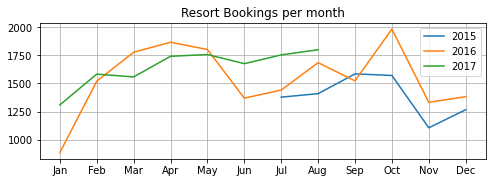

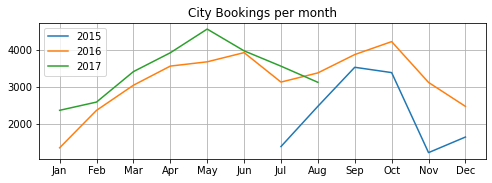

In [175]:
seasonality_plot(resort_bookings, 'size', 'Resort Bookings per month')
seasonality_plot(city_bookings, 'size', 'City Bookings per month')

### Simple approach: rolling average and naive methods

Using simple but ineffective methods to set some baseline for accuracy

Text(0.5, 1.0, 'City Bookings :: Rolling mean :: Accuracy (RMSE) [186.48895399]')

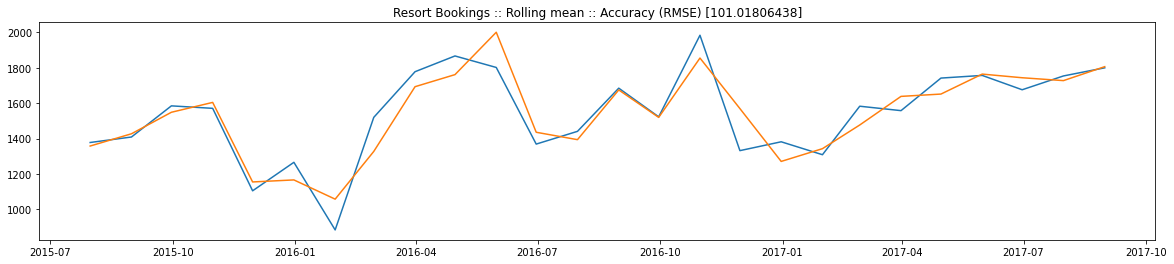

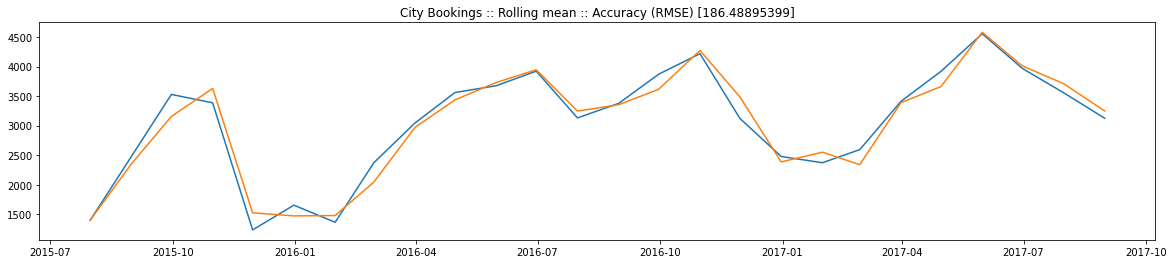

In [232]:
resort_roll_mean = resort_bookings.rolling(window='15D').mean().resample('M').sum()
resort_roll_acc = ((resort_monthly_bookings.values - resort_roll_mean) ** 2).mean() ** .5
city_roll_mean = city_bookings.rolling(window='15D').mean().resample('M').sum()
city_roll_acc = ((city_monthly_bookings.values - city_roll_mean) ** 2).mean() ** .5

plt.figure(figsize=[20,4])
plt.plot(resort_monthly_bookings)
plt.plot(resort_roll_mean)
plt.title('Resort Bookings :: Rolling mean :: Accuracy (RMSE) ' + str(resort_roll_acc.values))

plt.figure(figsize=[20,4])
plt.plot(city_monthly_bookings)
plt.plot(city_roll_mean)
plt.title('City Bookings :: Rolling mean :: Accuracy (RMSE) ' + str(city_roll_acc.values))

In [4]:
# TODO: 
# 1. describe data
# 2. plot data for the last x months. Does it have an overall trend? does it have a seasonal trend?
# 3. seasonality plot
# 4. plot rolling average and naive method results and measure accuracy (this will be our baseline)